In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

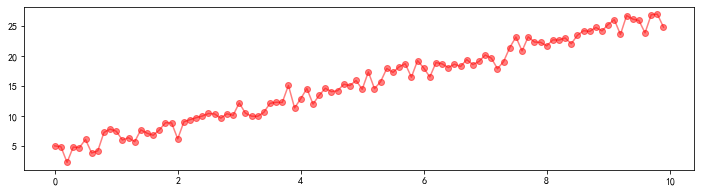

In [2]:
np.random.seed(242231)
x = np.arange(0, 10, 0.1)
y = 3.75 + 2.33 * x + np.random.randn(len(x)) 
plt.figure(figsize=(12, 3))
plt.plot(x, y, 'ro-', alpha=0.5)
plt.show()

In [3]:
df_mat = pd.DataFrame(y.reshape(-1, 1), columns=["xt"])
df_mat["xt_1"] = df_mat["xt"].shift(1)
df_mat["xt_2"] = df_mat["xt"].shift(2)
df_mat["xt_3"] = df_mat["xt"].shift(3)
df_mat["xt_4"] = df_mat["xt"].shift(4)
df_mat["xt_5"] = df_mat["xt"].shift(5)
df_set = df_mat.iloc[5:, :]
df_set

,xt,xt_1,xt_2,xt_3,xt_4,xt_5
5,6.118848,4.759679,4.847881,2.298866,4.913126,5.047238
6,3.865248,6.118848,4.759679,4.847881,2.298866,4.913126
7,4.224275,3.865248,6.118848,4.759679,4.847881,2.298866
8,7.283904,4.224275,3.865248,6.118848,4.759679,4.847881
9,7.845783,7.283904,4.224275,3.865248,6.118848,4.759679
...,...,...,...,...,...,...
95,25.944745,26.171198,26.766904,23.615186,26.078473,25.273082
96,23.884442,25.944745,26.171198,26.766904,23.615186,26.078473
97,26.896057,23.884442,25.944745,26.171198,26.766904,23.615186
98,27.001904,26.896057,23.884442,25.944745,26.171198,26.766904


In [4]:
df_set.corr()
## xt 和前面5期的数据都有超过0.5的相关系数

,xt,xt_1,xt_2,xt_3,xt_4,xt_5
xt,1.000000,0.973176,0.971114,0.975789,0.974315,0.973091
xt_1,0.973176,1.000000,0.973974,0.971707,0.975900,0.974646
xt_2,0.971114,0.973974,1.000000,0.973373,0.972632,0.975684
xt_3,0.975789,0.971707,0.973373,1.000000,0.973537,0.971373
xt_4,0.974315,0.975900,0.972632,0.973537,1.000000,0.974183
xt_5,0.973091,0.974646,0.975684,0.971373,0.974183,1.000000


In [5]:
yt = df_set["xt"].values
xt = df_set.iloc[:, 1:].values

np.random.seed(13013)
w = np.random.randn(5)
b = np.random.randn()

ls_res = list()
for i in range(100):
    y_ = b + np.dot(xt, w.T)
    mse = 0.5 * np.mean(np.power((yt-y_), 2))
    dw = -np.dot(yt-y_, xt) / len(xt)
    db = -np.sum(yt-y_) / len(xt)
    w -= dw*0.0005 # 不设置学习率，结果模型爆炸了
    b -= db*0.0005
    ls_res.append((i, w, b, mse, dw, db))

df_res = pd.DataFrame(ls_res, columns=("i", "w", "b", "mse", "dw", "db"))
df_res

,i,w,b,mse,dw,db
0,0,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.017296,27.279783,"[121.59187113340836, 119.63192611338704, 118.1...",6.465280
1,1,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.016324,4.057062,"[38.74387339425363, 37.86439838571308, 37.4734...",1.944839
2,2,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.016073,1.691009,"[12.303402817328672, 11.768944478336179, 11.73...",0.502194
3,3,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.016052,1.449277,"[3.865087181046537, 3.4409294529869174, 3.5252...",0.041810
4,4,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.016105,1.423914,"[1.1720612049408765, 0.7832956048279802, 0.904...",-0.105090
...,...,...,...,...,...,...
95,95,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.023917,1.349679,"[-0.08807045205998754, -0.43573025849423735, -...",-0.170199
96,96,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.024002,1.348933,"[-0.08804609470948635, -0.4354436055106694, -0...",-0.170159
97,97,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.024087,1.348188,"[-0.08802173610720739, -0.43515713340111944, -...",-0.170118
98,98,"[0.1113184420615128, -0.17820971506201533, 0.0...",0.024172,1.347444,"[-0.0879973762617876, -0.4348708420540142, -0....",-0.170078


[ 0.11131844 -0.17820972  0.02116984  1.16026513 -0.06825718]
0.02425688194492363
2.6630170806129194


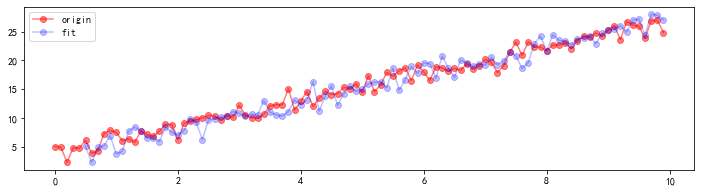

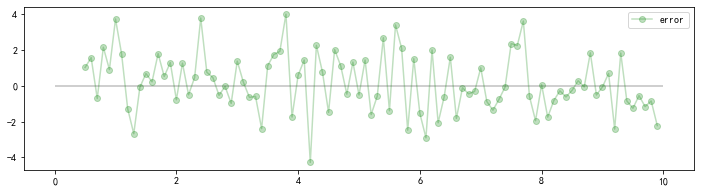

In [6]:
y_ = b + np.dot(xt, w.T)
e = y[5:]-y_
mse = np.mean(np.var(y[5:]-y_))
print(w) 
print(b)
print(mse)

plt.figure(figsize=(12, 3))
plt.plot(x, y, 'ro-', alpha=0.5, label='origin')
plt.plot(x[5:], y_, 'bo-', alpha=0.25, label='fit')
plt.legend()
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(x[5:], e, 'go-', alpha=0.25, label='error')
plt.hlines(y=0, xmin=0, xmax=10, color="black", alpha=0.25)
plt.legend()
plt.show()